## Wpierw należy zaimportować bibliotekę `tensorflow` i `numpy`.

Przygotowuję zbiory danych

In [1]:
import numpy as np # for init arry
import random
from pandas import DataFrame # for dataframes
from numpy import log as ln # for ln
import math # sin

In [2]:
random.shuffle(np.arange(1, 30, 0.1).tolist())

In [3]:
x_set = np.array(np.arange(1, 30, 0.1).tolist(), dtype=float)
random.shuffle(x_set)
y_set = np.array([0.25, 0.5, 0.75, 1], dtype=float)
random.shuffle(y_set)

In [4]:
print(x_set)
print(y_set)

[ 9.  25.2 23.4 29.3  5.9 19.9  1.2  4.9 20.3 28.6 22.   7.5  7.4 18.6
 19.1  7.2 10.9 26.8  6.3 17.5 19.7 10.7 25.9  5.5  5.  16.2 14.4 18.5
 14.8  9.8  5.4 26.2 28.4  2.5  5.1 15.7  8.3 20.4 20.   6.5 13.   4.
 27.5  6.7 16.4 26.6  1.5  5.3 28.5 21.2  8.   2.3  3.4  7.  24.  21.3
 17.1  7.8 12.3 14.3  5.6  2.2  9.6 10.5 14.6 19.3 11.3 13.1 21.9 26.
 12.4 22.2 16.8  1.7 16.7 13.9 25.5 26.5 22.5 19.5 20.8 15.   6.1 18.4
 18.  28.8 11.5 27.7  2.1 22.4  5.7  8.4 22.3 18.2 17.8 20.7  1.3 14.
 23.2 19.  26.9 22.7  1.1 23.8 10.2 29.8 14.7 15.6 21.7  3.8 11.7 24.6
 16.5  5.8 12.  10.6 11.6  6.9 28.7  4.6  6.4 19.6 10.1  6.  21.1 24.2
 18.1 11.2  3.9 26.7 27.9  1.  29.6 17.4 15.4 17.3 26.1  8.7 13.7 12.8
 27.3 28.9 14.9 29.5 24.4  2.7  3.7 15.8 12.7 11.8 10.4 19.8 25.3 16.1
  1.6 13.5  8.5 20.1 27.8 16.3 19.2 24.5 28.  27.6 24.3 29.1 13.2 12.2
  4.1  4.7 25.  14.1 22.8 24.1 14.5 25.6 22.6 11.4  2.6 18.8  2.8 16.9
 29.4 19.4 18.9 17.7  1.9 23.9  3.2  3.1 26.3 13.8 17.2 18.7 23.7 10.
 22.9  8.6

In [5]:
def function_a(x, y):
    return y * ln(x)

def function_b(x, y):
    return 2 * y * math.sin((x-1)/20)

In [6]:
function_a(5, 0.5)

0.8047189562170501

In [7]:
function_b(5, 0.5)

0.19866933079506122

In [8]:
list_a = []

for x in list(x_set):
  for y in list(y_set):
    data = {}
    data['x'] = x
    data['y'] = y
    data['result'] = function_a(x,y)
    list_a.append(data)
    
df_a = DataFrame(list_a)
    
list_b = []

for x in list(x_set):
  for y in list(y_set):
    data = {}
    data['x'] = x
    data['y'] = y
    data['result'] = function_b(x,y)
    list_b.append(data)

df_b = DataFrame(list_b)

In [9]:
df_a.head(5)

,x,y,result
0,9.0,0.25,0.549306
1,9.0,0.50,1.098612
2,9.0,0.75,1.647918
3,9.0,1.00,2.197225
4,25.2,0.25,0.806711


In [10]:
df_b.head(5)

,x,y,result
0,9.0,0.25,0.194709
1,9.0,0.50,0.389418
2,9.0,0.75,0.584128
3,9.0,1.00,0.778837
4,25.2,0.25,0.467808


In [11]:
from sklearn.model_selection import train_test_split

feature_col_names = ['x', 'y']
predicted_class_names = ['result']
split_test_size = 0.30

In [12]:
x_a = df_a[feature_col_names].values     # predictor feature columns
y_a = df_a[predicted_class_names].values # predicted value

x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size=split_test_size, random_state=42) 
# test_size = 0.3 is 30%, 42 is the answer to everything

print("{0:0.2f}% in training set of a".format((len(x_a_train)/len(df_a.index)) * 100))
print("{0:0.2f}% in test set of a".format((len(x_a_test)/len(df_a.index)) * 100))

70.00% in training set of a
30.00% in test set of a


In [13]:
x_a_train.shape

(812, 2)

In [14]:
x_b = df_b[feature_col_names].values     # predictor feature columns
y_b = df_b[predicted_class_names].values # predicted value

x_b_train, x_b_test, y_b_train, y_b_test = train_test_split(x_b, y_b, test_size=split_test_size, random_state=42)

print("{0:0.2f}% in training set of b".format((len(x_b_train)/len(df_b.index)) * 100))
print("{0:0.2f}% in test set of b".format((len(x_b_test)/len(df_b.index)) * 100))

70.00% in training set of b
30.00% in test set of b


## Budowa modelu, wyuczenie algorytmu i test wyników dla funkcji A

In [15]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
#model.add(Dense(100, activation='sigmoid'))
#model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_a_train, y_a_train, epochs=40, batch_size=30, validation_data=(x_a_test, y_a_test), verbose=False)

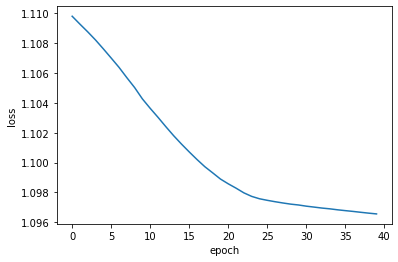

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history.history['loss'])
plt.show()

In [17]:
score_a, acc_a = model.evaluate(x_a_train, y_a_train,
                            batch_size=70)
print("score_a " + str(score_a))
print("acc_a " + str(acc_a))

12/12 [==============================] - 0s 545us/step - loss: 1.0965 - accuracy: 0.0012
score_a 1.0965156555175781
acc_a 0.001231527072377503


In [18]:
score_a, acc_a = model.evaluate(x_a_test, y_a_test,
                            batch_size=70)
print("score_a " + str(score_a))
print("acc_a " + str(acc_a))

5/5 [==============================] - 0s 1000us/step - loss: 1.0245 - accuracy: 0.0086
score_a 1.0244895219802856
acc_a 0.008620689623057842


In [19]:
print(function_a(7, 0.5))
print(model.predict([[7, 0.5]]))

0.9729550745276566
[[0.9877292]]
